# Classificação de Áreas


## Importando Bibliotecas


In [16]:
from osgeo import gdal
import pandas as pd
gdal.UseExceptions()
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier

## Abrindo as amostras para classificação

In [23]:
filenametiff = "data/recorte_tiff - Copia.png"
filenameshp = "data/recorte_shp.png"
datasettiff = gdal.Open(filenametiff, gdal.GA_ReadOnly)
datasetshp = gdal.Open(filenameshp, gdal.GA_ReadOnly) 

cols_tiff = datasettiff.RasterXSize
rows_tiff = datasettiff.RasterYSize
bands_tiff = datasettiff.RasterCount
driver_tiff = datasettiff.GetDriver().LongName #Verif
print('Imagem TIFF')
print(cols_tiff,rows_tiff,bands_tiff,driver_tiff)

cols_shp = datasetshp.RasterXSize
rows_shp = datasetshp.RasterYSize
bands_shp = datasetshp.RasterCount
driver_shp = datasetshp.GetDriver().LongName #Verif
print('Imagem SHAPEFILE')
print(cols_shp,rows_shp,bands_shp,driver_shp)



Imagem TIFF
2412 2340 3 Portable Network Graphics
Imagem SHAPEFILE
2392 2380 4 Portable Network Graphics


In [10]:
geotransformtiff = datasettiff.GetGeoTransform() #tranforma as coordenadas de pixel em espaço geográfico 
print(geotransformtiff)

geotransformshp = datasetshp.GetGeoTransform() 
print(geotransformshp)

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [11]:
originX = geotransformtiff[0]
originY = geotransformtiff[3]
pixelWidth = geotransformtiff[1]
pixelHeight = geotransformtiff[5]

print('OriginX=' , originX)
print('OriginY=' ,originY)
print('pixelWidth=' ,pixelWidth)
print('pixelHeight=' ,pixelHeight)

originX = geotransformshp[0]
originY = geotransformshp[3]
pixelWidth = geotransformshp[1]
pixelHeight = geotransformshp[5]

print('OriginX=' , originX)
print('OriginY=' ,originY)
print('pixelWidth=' ,pixelWidth)
print('pixelHeight=' ,pixelHeight)


OriginX= 0.0
OriginY= 0.0
pixelWidth= 1.0
pixelHeight= 1.0
OriginX= 0.0
OriginY= 0.0
pixelWidth= 1.0
pixelHeight= 1.0


In [12]:
#Separando as bandas da imagem tiff
band1_tiff = datasettiff.GetRasterBand(1)
data1_tiff = band1_tiff.ReadAsArray(0, 0, cols_tiff, rows_tiff)

band2_tiff = datasettiff.GetRasterBand(2)
data2_tiff = band2_tiff.ReadAsArray(0, 0, cols_tiff, rows_tiff)

band3_tiff = datasettiff.GetRasterBand(3)
data3_tiff = band3_tiff.ReadAsArray(0, 0, cols_tiff, rows_tiff)
#Montando o array com os valores do RGB
rgb_tiff = np.dstack((data1_tiff, data2_tiff, data3_tiff))

#print (rgb_tiff)

In [13]:
#Separando as bandas da imagem shp
band1_shp = datasetshp.GetRasterBand(1)
data1_shp = band1_shp.ReadAsArray(0, 0, cols_shp, rows_shp)

band2_shp = datasetshp.GetRasterBand(2)
data2_shp = band2_shp.ReadAsArray(0, 0, cols_shp, rows_shp)

band3_shp = datasetshp.GetRasterBand(3)
data3_shp = band3_shp.ReadAsArray(0, 0, cols_shp, rows_shp)
#Montando o array com os valores do RGB
rgb_shp = np.dstack((data1_shp,data2_shp,data3_shp))

#print (rgb_shp)

In [19]:
#np.savetxt('test.txt', rgb,fmt='%s',delimiter=",")
arq = open("saida/data.csv", "w")
arq.write("X, Y, B1_ORIGINAL, B2_ORIGINAL, B3_ORIGINAL, CLASSIFICACAO \n")

preservada = 0; #false

for i in range(rows_tiff):
    for j in range(cols_shp):
        #if((rgb_tiff[i][j][0] == 255) and (rgb_tiff[i][j][0] == 255) and (rgb_tiff[i][j][0] == 255)):
           # arq.write("%s, %s, [%s-%s-%s]\n"% (i,j,rgb_tiff[i][j][0],rgb_tiff[i][j][1],rgb_tiff[i][j][2]));
        if((rgb_shp[i][j][0] != 255) and (rgb_shp[i][j][0] != 255) and (rgb_shp[i][j][0] != 255)):
            #arq.write("%s, %s, [%s-%s-%s]\n"% (i,j,rgb_tiff[i][j][0],rgb_tiff[i][j][1],rgb_tiff[i][j][2]));
        #if ((rgb_tiff[i][j][0] != 255) and (rgb_tiff[i][j][1] != 255) and (rgb_tiff[i][j][2] != 255)):
            
            #if((rgb_tiff[i][j][0] == 9) and (rgb_tiff[i][j][1] == 1) and (rgb_tiff[i][j][2] == 255)):
                #arq.write("%s, %s, %s, %s, %s,Água \n"% (i,j,rgb_tiff[i][j][0],rgb_tiff[i][j][1],rgb_tiff[i][j][2]));
                #preservada = 1; # Area preservada
                #print(preservada)
        
            if ((rgb_tiff[i][j][0] == 3) and (rgb_tiff[i][j][1] == 33) and (rgb_tiff[i][j][2] == 185)):
                arq.write("%s, %s, %s, %s, %s,Várzea \n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2]));
                

            elif ((rgb_tiff[i][j][0] == 10) and (rgb_tiff[i][j][1] == 13) and (rgb_tiff[i][j][2] == 23)):
                arq.write("%s, %s, %s, %s, %s, Igapó \n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2]));

            elif ((rgb_tiff[i][j][0] == 9) and (rgb_tiff[i][j][1] == 20) and (rgb_tiff[i][j][2] == 121)):
                arq.write("%s, %s, %s, %s, %s,Zona de Transição \n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2]));

            elif ((rgb_tiff[i][j][0] == 246) and (rgb_tiff[i][j][1] == 211) and (rgb_tiff[i][j][2] == 208)):
                arq.write("%s, %s, %s, %s, %s,Solo exposto \n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2]));

            elif ((rgb_tiff[i][j][0] == 110) and (rgb_tiff[i][j][1] == 216) and (rgb_tiff[i][j][2] == 11)):
                arq.write("%s, %s, %s, %s, %s,Floresta \n"% (i,j,rgb_shp[i][j][0],rgb_shp[i][j][1],rgb_shp[i][j][2]));

        preservada = 0

arq.close()



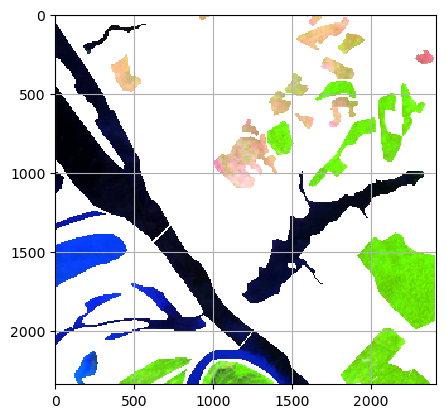

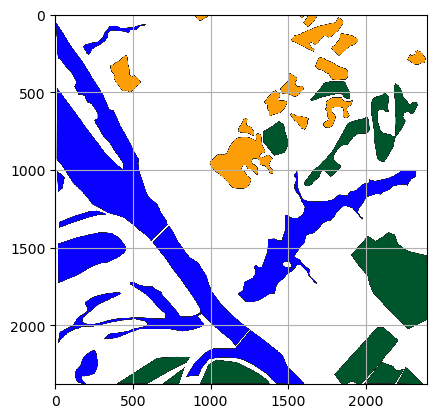

In [20]:
plt.figure(1)
plt.imshow(rgb_tiff, interpolation='nearest')
plt.grid()
plt.figure(2)
plt.imshow(rgb_shp, interpolation='nearest')
plt.grid()


In [23]:
data1 = pd.read_csv('data.csv', encoding = "ISO-8859-1")



In [24]:
varzea = data1[' CLASSIFICACAO ']=='Água'

In [25]:
varzea

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1288938    False
1288939    False
1288940    False
1288941    False
1288942    False
1288943    False
1288944    False
1288945    False
1288946    False
1288947    False
1288948    False
1288949    False
1288950    False
1288951    False
1288952    False
1288953    False
1288954    False
1288955    False
1288956    False
1288957    False
1288958    False
1288959    False
1288960    False
1288961    False
1288962    False
1288963    False
1288964    False
1288965    Fal